## 5.1 학습 모델 저장하고 재사용하기

In [8]:
import tensorflow as tf
import numpy as np

data = np.loadtxt('./data.csv', delimiter=',', unpack=True, dtype='float32',encoding='bytes')
                  
x_data= np.transpose(data[0:2])
y_data= np.transpose(data[2:])

In [9]:
x_data

array([[0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.]], dtype=float32)

In [10]:
y_data

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [11]:
global_step = tf.Variable(0, trainable=False, name='global_step') ##학습 횟수 카운트

In [12]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_uniform([2,10], -1., 1.))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_uniform([10,20], -1., 1.))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_uniform([20,3], -1., 1.))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(
tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost, global_step=global_step)

In [13]:
sess = tf.Session()
saver = tf.train.Saver(tf.global_variables())

In [14]:
ckpt = tf.train.get_checkpoint_state('./model')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else:
    sess.run(tf.global_variables_initializer())

In [19]:
for step in range(2):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    
    print('Step : %d, ' % sess.run(global_step),
         'Cost: %.3f' % sess.run(cost, feed_dict={X: x_data, Y: y_data}))
    
saver.save(sess, './model/dnn.ckpt', global_step=global_step)
    

Step : 5,  Cost: 0.895
Step : 6,  Cost: 0.863


'./model/dnn.ckpt-6'

In [6]:
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct= tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도 : %.2f' % sess.run(accuracy*100, feed_dict={X: x_data, Y: y_data}))

예측값: [0 1 2 0 0 2]
실제값: [0 1 2 0 0 2]
정확도 : 100.00


## 5.2 텐서보드 사용하기

In [2]:
import tensorflow as tf
import numpy as np

data = np.loadtxt('./data.csv', delimiter=',', unpack=True, dtype='float32')

x_data = np.transpose(data[0:2])
y_data = np.transpose(data[2:])

global_step = tf.Variable(0, trainable=False, name='global_step') ##학습 횟수 카운트

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

with tf.name_scope('layer1'):
    W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.), name='W1')
    L1 = tf.nn.relu(tf.matmul(X, W1))
    
with tf.name_scope('layer2'):
    W2 = tf.Variable(tf.random_uniform([10,20], -1., 1.), name='W2')
    L2 = tf.nn.relu(tf.matmul(L1, W2))
    
with tf.name_scope('output'):
    W3 = tf.Variable(tf.random_uniform([20,3], -1., 1.), name='W3')
    model = tf.matmul(L2, W3)
    
with tf.name_scope('optimizer'):
    cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
    train_op = optimizer.minimize(cost, global_step=global_step)

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [3]:
tf.summary.scalar('cost',cost)
tf.summary.histogram("Weights", W1)

<tf.Tensor 'Weights:0' shape=() dtype=string>

In [4]:
sess = tf.Session()
saver = tf.train.Saver(tf.global_variables())

ckpt = tf.train.get_checkpoint_state('./model')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else:
    sess.run(tf.global_variables_initializer())
    
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter('./logs', sess.graph)

for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    
    print('Step : %d, ' % sess.run(global_step),
         'Cost: %.3f' % sess.run(cost, feed_dict={X: x_data, Y: y_data}))

    summary = sess.run(merged, feed_dict={X: x_data, Y: y_data})
    writer.add_summary(summary, global_step=sess.run(global_step))
saver.save(sess, './model/dnn.ckpt', global_step=global_step)

Step : 1,  Cost: 0.868
Step : 2,  Cost: 0.805
Step : 3,  Cost: 0.753
Step : 4,  Cost: 0.710
Step : 5,  Cost: 0.676
Step : 6,  Cost: 0.653
Step : 7,  Cost: 0.638
Step : 8,  Cost: 0.628
Step : 9,  Cost: 0.620
Step : 10,  Cost: 0.615
Step : 11,  Cost: 0.610
Step : 12,  Cost: 0.606
Step : 13,  Cost: 0.603
Step : 14,  Cost: 0.599
Step : 15,  Cost: 0.596
Step : 16,  Cost: 0.592
Step : 17,  Cost: 0.588
Step : 18,  Cost: 0.585
Step : 19,  Cost: 0.581
Step : 20,  Cost: 0.578
Step : 21,  Cost: 0.575
Step : 22,  Cost: 0.572
Step : 23,  Cost: 0.569
Step : 24,  Cost: 0.567
Step : 25,  Cost: 0.565
Step : 26,  Cost: 0.563
Step : 27,  Cost: 0.561
Step : 28,  Cost: 0.560
Step : 29,  Cost: 0.559
Step : 30,  Cost: 0.558
Step : 31,  Cost: 0.557
Step : 32,  Cost: 0.556
Step : 33,  Cost: 0.555
Step : 34,  Cost: 0.555
Step : 35,  Cost: 0.554
Step : 36,  Cost: 0.554
Step : 37,  Cost: 0.553
Step : 38,  Cost: 0.553
Step : 39,  Cost: 0.553
Step : 40,  Cost: 0.552
Step : 41,  Cost: 0.552
Step : 42,  Cost: 0.552
S

'./model/dnn.ckpt-100'

In [5]:
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct= tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도 : %.2f' % sess.run(accuracy*100, feed_dict={X: x_data, Y: y_data}))

예측값: [0 1 2 0 0 2]
실제값: [0 1 2 0 0 2]
정확도 : 100.00


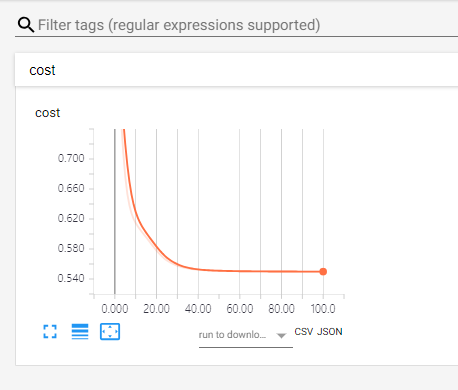

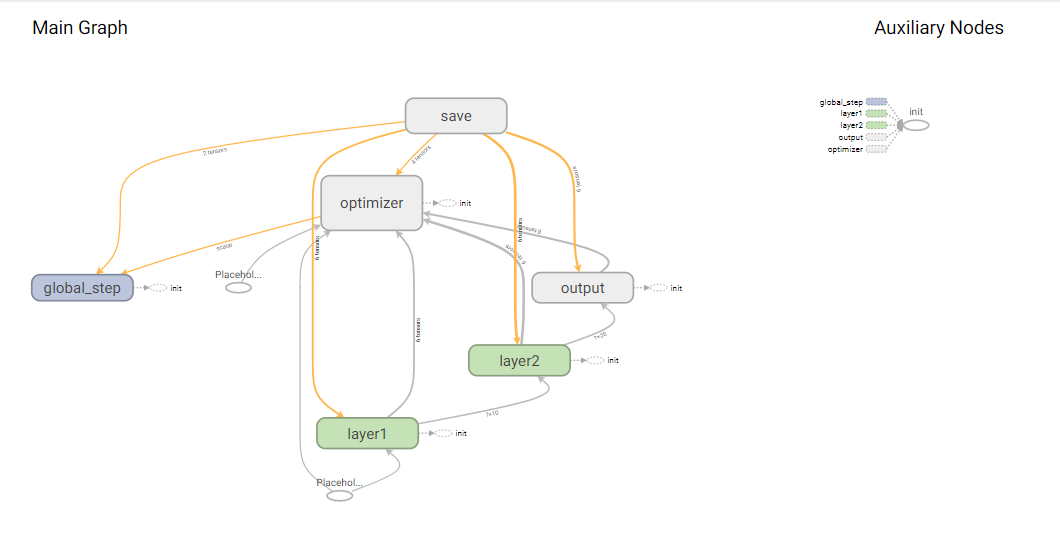

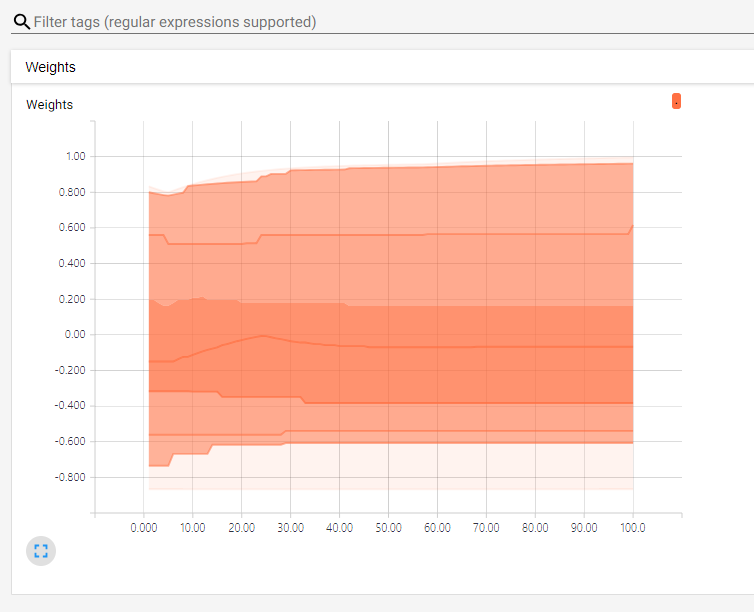